In [1]:
import numpy as np
import pandas as pd
import cv2
import os
import imagesize
import matplotlib.pyplot as plt
from glob import glob
from tqdm.notebook import tqdm

In [2]:
train_df_ = "/run/media/viper/移动硬盘/Dataset/happy-whale-and-dolphin/train.csv"
test_df_ = "/run/media/viper/移动硬盘/Dataset/happy-whale-and-dolphin/sample_submission.csv"

In [3]:
train_df = pd.read_csv(train_df_)
test_df = pd.read_csv(test_df_)

In [4]:
class CFG:
    seed = 42
    base_path = "/content/drive/Shareddrives/c003-10/Kaggle/HWAD/"
    base1_path = "/run/media/viper/移动硬盘/Dataset/happy-whale-and-dolphin/"
    train_path = base_path + "train_images/"
    test_path = base_path + "test_images/"
    train1_path = base1_path + "train_images/"
    test1_path = base1_path + "test_images/"

    ckpt_path = "/content/drive/Shareddrives/c003-10/Kaggle/HWAD/Model/"


In [5]:
def get_trainmy_file_path(id):
    return f"{CFG.train1_path}/{id}"
def get_testmy_file_path(id):
    return f"{CFG.test1_path}/{id}"
def get_train_file_path(id):
    return f"{CFG.train_path}/{id}"
def get_test_file_path(id):
    return f"{CFG.test_path}/{id}"

In [6]:
train_df['file_path'] = train_df['image'].apply(get_train_file_path)
train_df["local_path"] = train_df["image"].apply(get_trainmy_file_path)
train_df["split"] = "Train"
train_df.head(5)

,image,species,individual_id,file_path,local_path,split
0,00021adfb725ed.jpg,melon_headed_whale,cadddb1636b9,/content/drive/Shareddrives/c003-10/Kaggle/HWA...,/run/media/viper/移动硬盘/Dataset/happy-whale-and-...,Train
1,000562241d384d.jpg,humpback_whale,1a71fbb72250,/content/drive/Shareddrives/c003-10/Kaggle/HWA...,/run/media/viper/移动硬盘/Dataset/happy-whale-and-...,Train
2,0007c33415ce37.jpg,false_killer_whale,60008f293a2b,/content/drive/Shareddrives/c003-10/Kaggle/HWA...,/run/media/viper/移动硬盘/Dataset/happy-whale-and-...,Train
3,0007d9bca26a99.jpg,bottlenose_dolphin,4b00fe572063,/content/drive/Shareddrives/c003-10/Kaggle/HWA...,/run/media/viper/移动硬盘/Dataset/happy-whale-and-...,Train
4,00087baf5cef7a.jpg,humpback_whale,8e5253662392,/content/drive/Shareddrives/c003-10/Kaggle/HWA...,/run/media/viper/移动硬盘/Dataset/happy-whale-and-...,Train


In [7]:
test_df["file_path"] = test_df["image"].apply(get_test_file_path)
test_df["local_path"] = test_df["image"].apply(get_testmy_file_path)
test_df["split"] = "Test"
test_df.head(5)

,image,predictions,file_path,local_path,split
0,000110707af0ba.jpg,37c7aba965a5 114207cab555 a6e325d8e924 19fbb96...,/content/drive/Shareddrives/c003-10/Kaggle/HWA...,/run/media/viper/移动硬盘/Dataset/happy-whale-and-...,Test
1,0006287ec424cb.jpg,37c7aba965a5 114207cab555 a6e325d8e924 19fbb96...,/content/drive/Shareddrives/c003-10/Kaggle/HWA...,/run/media/viper/移动硬盘/Dataset/happy-whale-and-...,Test
2,000809ecb2ccad.jpg,37c7aba965a5 114207cab555 a6e325d8e924 19fbb96...,/content/drive/Shareddrives/c003-10/Kaggle/HWA...,/run/media/viper/移动硬盘/Dataset/happy-whale-and-...,Test
3,00098d1376dab2.jpg,37c7aba965a5 114207cab555 a6e325d8e924 19fbb96...,/content/drive/Shareddrives/c003-10/Kaggle/HWA...,/run/media/viper/移动硬盘/Dataset/happy-whale-and-...,Test
4,000b8d89c738bd.jpg,37c7aba965a5 114207cab555 a6e325d8e924 19fbb96...,/content/drive/Shareddrives/c003-10/Kaggle/HWA...,/run/media/viper/移动硬盘/Dataset/happy-whale-and-...,Test


In [8]:
train_df.loc[train_df.species.str.contains("beluga"), "species"] = "beluga_whale"
train_df.loc[train_df.species.str.contains("globis"), "species"] = "short_finned_pilot_whale"
train_df.loc[train_df.species.str.contains("pilot_whale"), "species"] = "short_finned_pilot_whale"
train_df["class"] = train_df.species.map(lambda x: "whale" if "whale" in x else "dolphin")

train_df["species"] = train_df["species"].replace("bottlenose_dolpin", "bottlenose_dolphin")
train_df["species"] = train_df["species"].str.replace("kiler_whale", "killer_whale")

train_df.head(5)


,image,species,individual_id,file_path,local_path,split,class
0,00021adfb725ed.jpg,melon_headed_whale,cadddb1636b9,/content/drive/Shareddrives/c003-10/Kaggle/HWA...,/run/media/viper/移动硬盘/Dataset/happy-whale-and-...,Train,whale
1,000562241d384d.jpg,humpback_whale,1a71fbb72250,/content/drive/Shareddrives/c003-10/Kaggle/HWA...,/run/media/viper/移动硬盘/Dataset/happy-whale-and-...,Train,whale
2,0007c33415ce37.jpg,false_killer_whale,60008f293a2b,/content/drive/Shareddrives/c003-10/Kaggle/HWA...,/run/media/viper/移动硬盘/Dataset/happy-whale-and-...,Train,whale
3,0007d9bca26a99.jpg,bottlenose_dolphin,4b00fe572063,/content/drive/Shareddrives/c003-10/Kaggle/HWA...,/run/media/viper/移动硬盘/Dataset/happy-whale-and-...,Train,dolphin
4,00087baf5cef7a.jpg,humpback_whale,8e5253662392,/content/drive/Shareddrives/c003-10/Kaggle/HWA...,/run/media/viper/移动硬盘/Dataset/happy-whale-and-...,Train,whale


In [9]:
def get_imageSize(row):
    row["width"], row["height"] = imagesize.get(row["local_path"])
    return row

In [10]:
from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 16 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [11]:
tqdm.pandas(desc = "Train")
train_df = train_df.parallel_apply(get_imageSize, axis=1)
train_df.to_csv("newTrain.csv", index=False)

In [12]:
tqdm.pandas(desc="Test")
test_df = test_df.parallel_apply(get_imageSize, axis=1)
test_df.to_csv("newTest.csv", index=False)

In [15]:
tqdm.pandas()
idx = 0
for i in tqdm(range(len(train_df))):
    if i % 1000 == 0:
        idx += 1

    file_path_ = train_df.iloc[i, 3].split("/")
    file_path = train_df.iloc[i, 4].split("/")

    new_file_path_ = "/" + os.path.join(*train_df.iloc[i, 3].split("/")[:-3], "image", f"a{idx}", file_path_[-1])
    train_df.iloc[i, 3] = new_file_path_
train_df.to_csv("newTrain1.csv", index=False)

  0%|          | 0/51033 [00:00<?, ?it/s]

In [16]:
tqdm.pandas()
idx = 0
for i in tqdm(range(len(test_df))):
    if i % 1000 == 0:
        idx += 1
    file_path_ = test_df.iloc[i, 2].split("/")
    file_path = test_df.iloc[i, 3].split("/")

    new_file_path_ = "/" + os.path.join(*test_df.iloc[i, 2].split("/")[:-3], "image", f"b{idx}", file_path_[-1])
    train_df.iloc[i, 3] = new_file_path_
test_df.to_csv("newTest1.csv", index=False)

  0%|          | 0/27956 [00:00<?, ?it/s]

In [81]:
tqdm.pandas()
idx = 0
for i in tqdm(range(len(train_df))):
    if i % 1000 == 0:
        idx += 1
    # img = cv2.imread(train_df.iloc[i, 4])
    # img = cv2.resize(img, dsize=(224,224))
    file_path_ = train_df.iloc[i, 3].split("/")
    file_path = train_df.iloc[i, 4].split("/")

    new_file_path_ = "/" + os.path.join(*train_df.iloc[i, 3].split("/"), "image", f"a{idx}", file_path_[-1])
    new_file_path = "/" + os.path.join(*train_df.iloc[i, 4].split("/")[1:-3],"image", f"a{idx}", file_path[-1])
    cv2.imwrite(new_file_path, img)
    train_df.iloc[i, 3] = new_file_path_

  0%|          | 0/51033 [00:00<?, ?it/s]

In [91]:
tqdm.pandas()
idx = 0
for i in tqdm(range(len(test_df))):
    if i % 1000 == 0:
        idx += 1
    img = cv2.imread(test_df.iloc[i, 3])
    img = cv2.resize(img, dsize=(224,224))
    file_path_ = test_df.iloc[i, 2].split("/")
    file_path = test_df.iloc[i, 3].split("/")

    new_file_path_ = "/" + os.path.join(*test_df.iloc[i, 2].split("/"), "image", f"b{idx}", file_path_[-1])
    new_file_path = "/" + os.path.join(*test_df.iloc[i, 3].split("/")[1:-3],"image", f"b{idx}", file_path[-1])
    cv2.imwrite(new_file_path, img)
    train_df.iloc[i, 3] = new_file_path_

  0%|          | 0/27956 [00:00<?, ?it/s]

In [87]:
test_df.head(5)

,image,predictions,file_path,local_path,split,width,height
0,000110707af0ba.jpg,37c7aba965a5 114207cab555 a6e325d8e924 19fbb96...,/content/drive/Shareddrives/c003-10/Kaggle/HWA...,/run/media/viper/移动硬盘/Dataset/happy-whale-and-...,Test,3599,2399
1,0006287ec424cb.jpg,37c7aba965a5 114207cab555 a6e325d8e924 19fbb96...,/content/drive/Shareddrives/c003-10/Kaggle/HWA...,/run/media/viper/移动硬盘/Dataset/happy-whale-and-...,Test,3600,2400
2,000809ecb2ccad.jpg,37c7aba965a5 114207cab555 a6e325d8e924 19fbb96...,/content/drive/Shareddrives/c003-10/Kaggle/HWA...,/run/media/viper/移动硬盘/Dataset/happy-whale-and-...,Test,2240,1488
3,00098d1376dab2.jpg,37c7aba965a5 114207cab555 a6e325d8e924 19fbb96...,/content/drive/Shareddrives/c003-10/Kaggle/HWA...,/run/media/viper/移动硬盘/Dataset/happy-whale-and-...,Test,2048,892
4,000b8d89c738bd.jpg,37c7aba965a5 114207cab555 a6e325d8e924 19fbb96...,/content/drive/Shareddrives/c003-10/Kaggle/HWA...,/run/media/viper/移动硬盘/Dataset/happy-whale-and-...,Test,293,319


In [88]:
train_df.head(5)

,image,species,individual_id,file_path,local_path,split,class,width,height
0,00021adfb725ed.jpg,melon_headed_whale,cadddb1636b9,/drive/Shareddrives/c003-10/a1/00021adfb725ed....,/run/media/viper/移动硬盘/Dataset/happy-whale-and-...,Train,whale,804,671
1,000562241d384d.jpg,humpback_whale,1a71fbb72250,/drive/Shareddrives/c003-10/a1/000562241d384d....,/run/media/viper/移动硬盘/Dataset/happy-whale-and-...,Train,whale,3504,2336
2,0007c33415ce37.jpg,false_killer_whale,60008f293a2b,/drive/Shareddrives/c003-10/a1/0007c33415ce37....,/run/media/viper/移动硬盘/Dataset/happy-whale-and-...,Train,whale,3599,2399
3,0007d9bca26a99.jpg,bottlenose_dolphin,4b00fe572063,/drive/Shareddrives/c003-10/a1/0007d9bca26a99....,/run/media/viper/移动硬盘/Dataset/happy-whale-and-...,Train,dolphin,3504,2336
4,00087baf5cef7a.jpg,humpback_whale,8e5253662392,/drive/Shareddrives/c003-10/a1/00087baf5cef7a....,/run/media/viper/移动硬盘/Dataset/happy-whale-and-...,Train,whale,3599,2699


In [46]:
len(train_df), len(test_df)

(51033, 27956)

In [50]:
for i in range(1, 53):
    os.makedirs(f"/run/media/viper/移动硬盘/Dataset/happy-whale-and-dolphin/image/a{i}")
for i in range(1, 29):
    os.makedirs(f"/run/media/viper/移动硬盘/Dataset/happy-whale-and-dolphin/image/b{i}")

In [73]:
train_df["local_path"][0]

'/run/media/viper/移动硬盘/Dataset/happy-whale-and-dolphin/train_images//00021adfb725ed.jpg'

In [78]:
img  = cv2.imread(train_df["local_path"][10])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

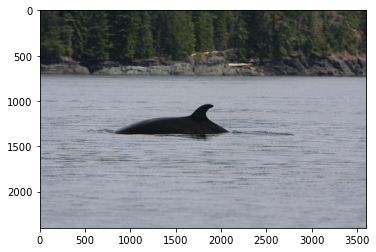

In [79]:
plt.imshow(img)

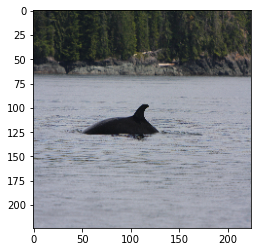

In [80]:
img = cv2.resize(img, dsize= (224,224))
plt.imshow(img)